In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import os
from tqdm.notebook import tqdm

In [2]:
drawing=False # true if mouse is pressed
mode=True # if True, draw rectangle. Press 'm' to toggle to curve
size = 10
color = (255,255,255)


In [3]:
def draw_on_image_from_path(image_path):
    
    def drawing_tool(event,former_x,former_y,flags,param):
        global current_former_x,current_former_y,drawing, mode, size, color

        if event==cv2.EVENT_LBUTTONDOWN:
            drawing=True
            current_former_x,current_former_y=former_x,former_y

        elif event==cv2.EVENT_MOUSEMOVE:
            if drawing==True:
                if mode==True:
                    cv2.line(im,(current_former_x,current_former_y),(former_x,former_y),color,size)
                    cv2.line(mask,(current_former_x,current_former_y),(former_x,former_y),color,size)

                    current_former_x = former_x
                    current_former_y = former_y
                    #print former_x,former_y
        elif event==cv2.EVENT_LBUTTONUP:
            drawing=False
            if mode==True:
                cv2.line(im,(current_former_x,current_former_y),(former_x,former_y),color,size)
                cv2.line(mask,(current_former_x,current_former_y),(former_x,former_y),color,size)

                current_former_x = former_x
                current_former_y = former_y
        return former_x,former_y    

    
    im_org = read_and_shrink_image(image_path, 1)
    im = im_org.copy()
    mask = np.zeros(im.shape)
    cv2.namedWindow("poor_man\'s_photoshop [Press ESC to exit window]")
    cv2.setMouseCallback('poor_man\'s_photoshop [Press ESC to exit window]',drawing_tool)
    
    while(1):
        cv2.imshow('poor_man\'s_photoshop [Press ESC to exit window]',im)
        k=cv2.waitKey(1)&0xFF
        if k==27:
#             print("break")
            break
    cv2.destroyAllWindows()
    
    im_color = cv2.cvtColor(im_org, cv2.COLOR_BGR2RGB)
    return im_color, mask

def read_and_shrink_image(image_path, shrink_factor = 2):
    raw_img = cv2.imread(image_path, cv2.IMREAD_COLOR ) 
    raw_img_small = cv2.resize(raw_img, (int(raw_img.shape[1]/shrink_factor), int(raw_img.shape[0]/shrink_factor)))
    return raw_img_small

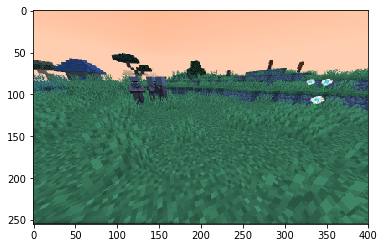

In [7]:
plt.imshow(read_and_shrink_image("raw_frames/93.jpg",2))

In [8]:
im, mask = draw_on_image_from_path("raw_frames/93.jpg")


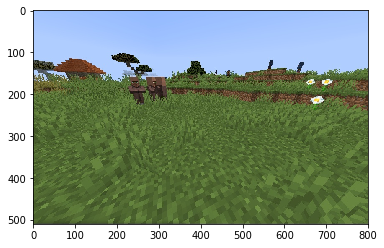

In [9]:
plt.imshow(im)

In [11]:
!mkdir masks
!mkdir images 

In [4]:
def draw_mask_and_save_pair(image_path, image_save_name, mask_save_name):
    im, mask = draw_on_image_from_path(image_path)
    cv2.imwrite(image_save_name, im)
    cv2.imwrite(mask_save_name, mask)
#     print("saved image-- ", image_save_name)
#     print("saved mask-- ", mask_save_name)

In [5]:
def generate_training_data(original_image_folder, image_folder , mask_folder):
    
    already_drawn_masks = os.listdir(mask_folder)
    
    for i in tqdm(os.listdir(original_image_folder)):
        
        image_path = original_image_folder + "/" + i
        image_save_name = image_folder + "/" + "real_"+ i
        mask_save_name  = mask_folder + "/" + "mask_" + i
        
        mask_name = "mask_" + i
        
        if mask_name in already_drawn_masks:
#             print("found copy -- ", mask_save_name )
            continue
        else:
            draw_mask_and_save_pair(image_path, image_save_name, mask_save_name)
            
    print("Saved images at-- ", image_folder)
    print("Saved masks at-- ", image_folder)

In [ ]:
generate_training_data("raw_frames", "images", "masks")
